# Comparing Antenna Element Calculations with Matlab
Compare the results with the equivalent Matlab code "MatlabFiles/AntennaElement.mlx". [Here](MatlabFiles/AntennaElement.html) is the execution results of this code in Matlab.

In [1]:
import numpy as np
import scipy.io

import neoradium as nr
# Note: See the "AntennaElement.mlx" file in the "MatlabFiles" directory and compare with the 
# following results.

In [2]:
# Create an antenna element with 65° beam width and maximum attenuation of 30db
el = nr.AntennaElement(beamWidth=[65,65], maxAttenuation=30)


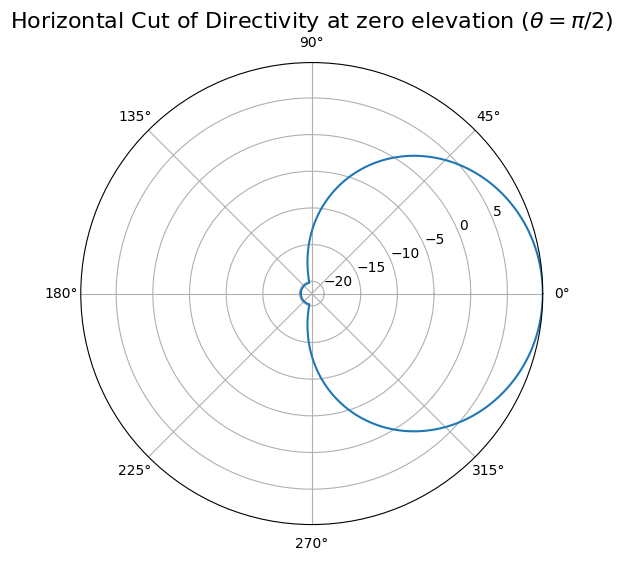

(np.float64(-20.174314951982485),
 np.float64(9.825685048017517),
 array([9.75467913, 9.78024126, 9.80012292, 9.8143241 , 9.82284481,
        9.82568505, 9.82284481, 9.8143241 , 9.80012292, 9.78024126]))

In [3]:
# Depending on the input parameters the "drawRadiation" method can create different types of graphs. Here
# we draw the directivity of our antenna element at the horizontal plane of zero elevation.
radValues = el.drawRadiation(theta=90, viewAngles=(90,0), radiationType="Directivity", normalize=True)

# We can print a selected portion of the field values returned by this function and compare the results
# with Matlab.
radValues.min(),radValues.max(),radValues[175:185]

Expected (from Matlab):
```
array([9.75467913, 9.78024126, 9.80012292, 9.8143241 , 9.82284481,
       9.82568505, 9.82284481, 9.8143241 , 9.80012292, 9.78024126]))
```

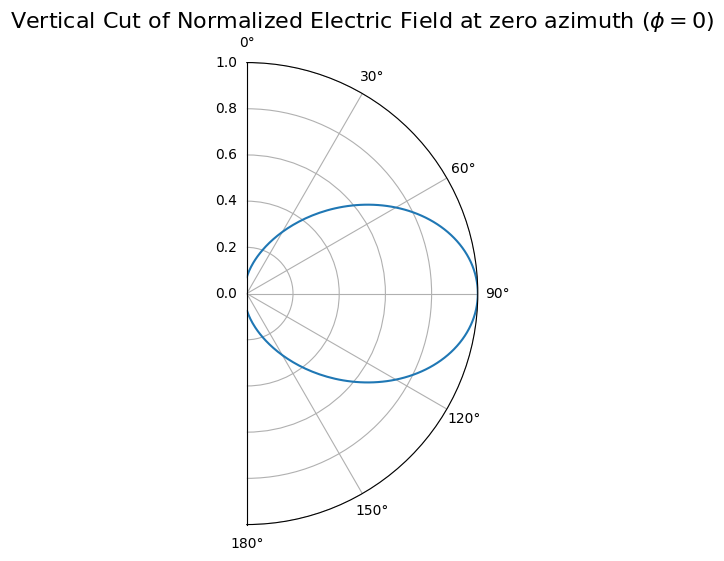

(np.float64(0.07074636689134867),
 np.float64(1.0),
 array([0.5926265 , 0.57713592, 0.5616828 , 0.54628606, 0.53096402,
        0.51573432, 0.50061396, 0.48561921, 0.47076561, 0.45606798]))

In [4]:
# Here the "drawRadiation" method is used to draw the Field values in the vertical plane at azimuth angle 0.
radValues = el.drawRadiation(phi=0, radiationType="Field", normalize=True)

# Print a selected portion of the field values and compare the results with Matlab. 
radValues.min(),radValues.max(),radValues[130:140]

Expected (from Matlab):
```
array([0.5926265 , 0.57713592, 0.5616828 , 0.54628606, 0.53096402,
       0.51573432, 0.50061396, 0.48561921, 0.47076561, 0.45606798]))
```

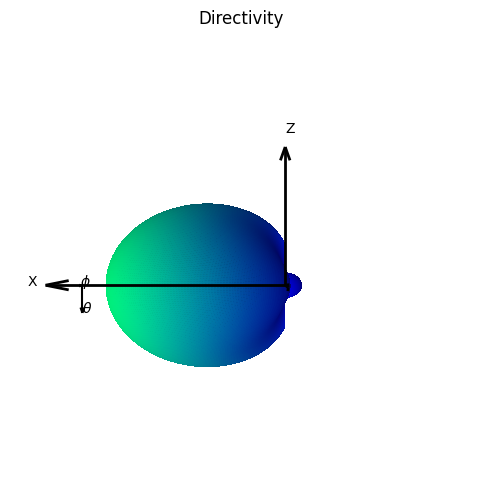

(np.float64(-20.174314951982485),
 np.float64(9.825685048017517),
 array([9.75467913, 9.78024126, 9.80012292, 9.8143241 , 9.82284481,
        9.82568505, 9.82284481, 9.8143241 , 9.80012292, 9.78024126]))

In [5]:
# Here the "drawRadiation" method is used to draw a 3D graph of directivity.
radValues = el.drawRadiation(radiationType="Directivity", normalize=True, viewAngles=(90,0))

# Print a selected portion of the directivity values and compare the results with Matlab. 
radValues.min(),radValues.max(),radValues[85:95,180]

Expected (from Matlab):
```
array([9.75467913, 9.78024126, 9.80012292, 9.8143241 , 9.82284481,
       9.82568505, 9.82284481, 9.8143241 , 9.80012292, 9.78024126]))
```

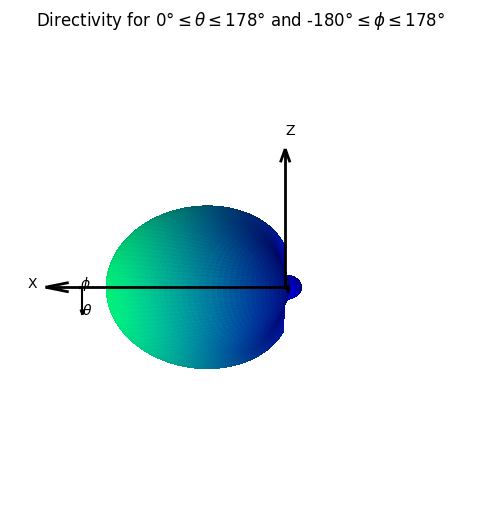

In [6]:
# Here the "drawRadiation" method is used again to draw a 3D graph of directivity. This time however, we are
# specifying the angle resolution to be 2 degree. This makes the graph generation faster but also coarser than
# the previous one. (The default angle resolution is 1 degree)
radValues = el.drawRadiation(theta=np.arange(0,180,2), phi=np.arange(-180,180,2), 
                             radiationType="Directivity", normalize=True, viewAngles=(90,0))

In [7]:
# Comparing the directivity calculations with Matlab
directivity = el.getDirectivity()

# Read the file created by Matlab for "directivity" values
directivityMatlab = scipy.io.loadmat('MatlabFiles/ElementDirectivity.mat')['directivity']
directivityMatlab = directivityMatlab[:-1,:-1]
assert directivityMatlab.shape==directivity.shape

print("Shape of Directivity results:", directivity.shape)
print("Maximum difference between the results:", np.abs(directivity-directivityMatlab).max())


Shape of Directivity results: (180, 360)
Maximum difference between the results: 3.552713678800501e-14


In [8]:
# Comparing the field calculations with Matlab
field = el.getField()

# Read the file created by Matlab for "field" values
fieldMatlab = scipy.io.loadmat('MatlabFiles/ElementField.mat')['field']
fieldMatlab = fieldMatlab[:-1,:-1]
assert fieldMatlab.shape==field.shape
print("Shape of Field values:", field.shape)
print("Maximum difference between the results:", np.abs(field-fieldMatlab).max())


Shape of Field values: (180, 360)
Maximum difference between the results: 4.440892098500626e-16


In [9]:
# Comparing the power calculations with Matlab
powerDb = el.getPowerPatternDb()

# Read the file created by Matlab for "powerDb" values
powerDbMatlab = scipy.io.loadmat('MatlabFiles/ElementPowerDb.mat')['powerDb']
powerDbMatlab = powerDbMatlab[:-1,:-1]
assert powerDbMatlab.shape==powerDb.shape
print("Shape of power values:", powerDb.shape)
print("Maximum difference between the results:", np.abs(powerDb-powerDbMatlab).max())


Shape of power values: (180, 360)
Maximum difference between the results: 3.197442310920451e-14
